<a href="https://colab.research.google.com/github/happyboyto/Homework/blob/master/PBL_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
dataset_folder_path = '/content/drive/MyDrive/rerere/train/' 
test_dataset_folder_path = '/content/drive/MyDrive/rerere/test/'
categories = ["LDD", "LYY", "SDD", "SYY"]
num_classes = len(categories)

In [ ]:
image_w = 100
image_h = 100

X_train = []
Y_train = []
X_test = []
Y_test = []

for idex, categorie in enumerate(categories):
    label = categories[idex]
    image_dir = dataset_folder_path + categorie + '/'

    for top, dir, f in os.walk(image_dir):
        for filename in f:
            print(image_dir+filename)
            img = cv2.imread(image_dir+filename)
            img = cv2.resize(img,None,fx=image_w/img.shape[1],fy=image_h/img.shape[0])
            X_train.append(img/255.0)
            Y_train.append(idex)


for idex, categorie in enumerate(categories):
    label = categories[idex]
    image_dir = test_dataset_folder_path + categorie + '/'

    for top, dir, f in os.walk(image_dir):
        for filename in f:
            print(image_dir+filename)
            img = cv2.imread(image_dir+filename)
            img = cv2.resize(img,None,fx=image_w/img.shape[1],fy=image_h/img.shape[0])
            X_test.append(img/255.0)
            Y_test.append(idex)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_train = to_categorical(Y_train)

xy = (X_train, X_test, Y_train, Y_test)

np.save("/content/drive/MyDrive/cnndataset_final/img_data_npy",xy)


/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_18.jpg
/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_16.jpg
/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_06.jpg
/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_01.jpg
/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_17.jpg
/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_13.jpg
/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_04.jpg
/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_11.jpg
/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_03.jpg
/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_05.jpg
/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_12.jpg
/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_15.jpg
/content/drive/MyDrive/rerere/train/LDD/KakaoTalk_20201116_134222083_14.jpg
/content/dri

In [ ]:
X_train[0].shape

(100, 100, 3)

In [ ]:
Y_train[0].shape

(4,)

In [ ]:
IMG_SIZE  = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)


input_tensor = tf.keras.Input(shape=(100, 100, 3))
resized_images = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224, 224)))(input_tensor)

base_model = tf.keras.applications.Xception(input_tensor=resized_images,
                                               input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
flatten_layer = tf.keras.layers.Flatten()
num_classes = 4
prediction_layer = tf.keras.layers.Dense(num_classes, activation = 'softmax')

In [ ]:
model = tf.keras.Sequential([
  base_model,
  flatten_layer,
  prediction_layer
])

In [ ]:
base_model.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  133


In [ ]:
fine_tune_at = 0

# `fine_tune_at` 층 이전의 모든 층을 고정
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/term_project/mobile_v2_transfer.h5', 
                     monitor='val_accuracy', 
                     mode='max', 
                     verbose=1)

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False )

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),  # default learning rate = 0.001
              metrics=['accuracy', 'top_k_categorical_accuracy'])

In [ ]:
initial_epochs = 10
fine_tune_epochs = 200
total_epochs =  initial_epochs + fine_tune_epochs
history_fine = model.fit(X_train, Y_train, 
                     batch_size = 10,
                     validation_split = 0.2,
                     epochs=total_epochs,
                     callbacks=[mc])

Epoch 1/210
11/11 [==============================] - ETA: 0s - loss: 0.5503 - accuracy: 0.7981 - top_k_categorical_accuracy: 1.0000
Epoch 00001: saving model to /content/drive/MyDrive/Colab Notebooks/term_project/mobile_v2_transfer.h5
11/11 [==============================] - 3s 285ms/step - loss: 0.5503 - accuracy: 0.7981 - top_k_categorical_accuracy: 1.0000 - val_loss: 3.7158 - val_accuracy: 0.0000e+00 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/210
11/11 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9904 - top_k_categorical_accuracy: 1.0000
Epoch 00002: saving model to /content/drive/MyDrive/Colab Notebooks/term_project/mobile_v2_transfer.h5
11/11 [==============================] - 2s 196ms/step - loss: 0.0191 - accuracy: 0.9904 - top_k_categorical_accuracy: 1.0000 - val_loss: 3.1974 - val_accuracy: 0.0000e+00 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/210
11/11 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000 - top_k_c

KeyboardInterrupt: ignored

In [ ]:
loss, acc, k_acc = model.evaluate(X_test,  Y_test, verbose=2)

print('모델의 정확도 (top-1-error): {:5.2f}%'.format(100*acc))
print('모델의 정확도 (top-5-error): {:5.2f}%'.format(100*k_acc))

3/3 - 0s - loss: 0.0594 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000
모델의 정확도 (top-1-error): 100.00%
모델의 정확도 (top-5-error): 100.00%


In [ ]:
predictions = model.predict(X_test)

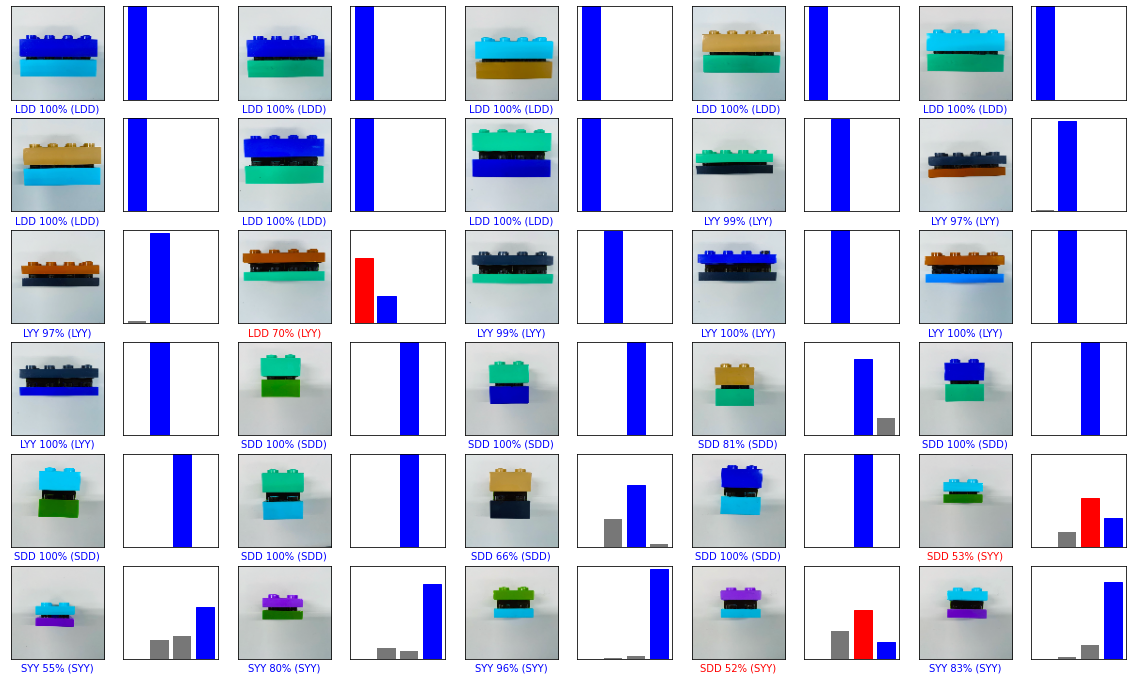

In [ ]:
num_rows = 6
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, Y_test)
plt.show()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(categories[predicted_label],
                                100*np.max(predictions_array),
                                categories[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')